In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Database

## Importing raw database

In [2]:
df = pd.read_csv("_data/weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## Add new variables

In [3]:
df['Altura'] = df['Height'] * 0.0254
df['Peso'] = df['Weight'] * .453592
df['IMC'] = df['Peso'] / (df['Altura'] * df['Altura'])
df.head()

,Gender,Height,Weight,Altura,Peso,IMC
0,Male,73.847017,241.893563,1.875714,109.720985,31.185761
1,Male,68.781904,162.310473,1.747060,73.622732,24.121044
2,Male,74.110105,212.740856,1.882397,96.497550,27.232906
3,Male,71.730978,220.042470,1.821967,99.809504,30.067059
4,Male,69.881796,206.349801,1.774998,93.598619,29.708033


In [4]:
def status(imc):
    if imc < 18.5:
        return 'Magreza'
    elif imc <= 24.9:
        return 'Saudável'
    elif imc <= 29.9:
        return 'Sobrepeso'
    elif imc <= 34.9:
        return 'Obesidade G1'
    elif imc <= 39.9:
        return 'Obesidade Severa G2'
    else:
        return 'Obesidade Mórbida G3'
    

In [5]:
df['classe'] = df['IMC'].apply(status)
df.head()

,Gender,Height,Weight,Altura,Peso,IMC,classe
0,Male,73.847017,241.893563,1.875714,109.720985,31.185761,Obesidade G1
1,Male,68.781904,162.310473,1.747060,73.622732,24.121044,Saudável
2,Male,74.110105,212.740856,1.882397,96.497550,27.232906,Sobrepeso
3,Male,71.730978,220.042470,1.821967,99.809504,30.067059,Obesidade G1
4,Male,69.881796,206.349801,1.774998,93.598619,29.708033,Sobrepeso


In [6]:
df.describe()

,Height,Weight,Altura,Peso,IMC
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,66.367560,161.440357,1.685736,73.228054,25.475457
std,3.847528,32.108439,0.097727,14.564131,2.693810
min,54.263133,64.700127,1.378284,29.347460,15.448750
25%,63.505620,135.818051,1.613043,61.605982,23.464807
50%,66.318070,161.212928,1.684479,73.124894,25.733316
75%,69.174262,187.169525,1.757026,84.898599,27.558535
max,78.998742,269.989699,2.006568,122.465167,33.028103


## Linear Regression

### Manually

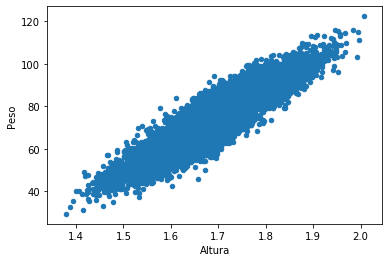

In [10]:
df.plot.scatter(x='Altura', y='Peso')

360862.03407219611

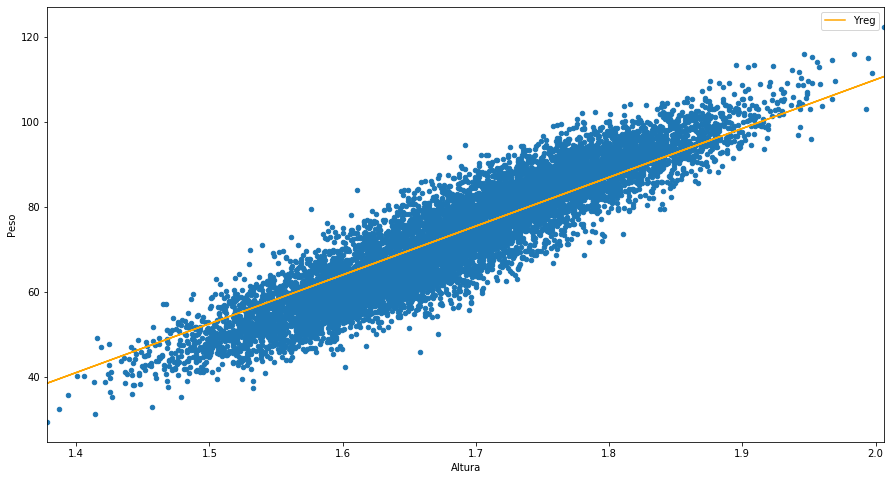

In [50]:
# Y = a * X + b
a = 115
b = -120

df['Yreg'] = a * df['Altura'] + b

ax = df.plot.scatter(x='Altura', y='Peso', figsize=(15,8))
df.plot(x='Altura', y='Yreg', ax=ax, color='orange')

erro = (df['Yreg'] - df['Peso']) ** 2
erro.sum()

In [52]:
Emed = (df['Peso'] - df['Yreg'].mean()) ** 2
Emed

0       1286.035927
1          0.056126
2        512.474884
3        673.395345
4        389.627202
5         23.207592
6         91.557662
7          5.432209
8         35.290071
9          8.514724
10       116.270056
11       533.223954
12         3.794849
13       145.724257
14       114.605698
15        18.002811
16       226.722892
17        20.783724
18       110.275059
19        78.989897
20        26.193417
21       250.580952
22        38.386771
23       894.301342
24         0.140416
25       179.186254
26        96.014082
27       398.240741
28        31.539360
29        14.830631
           ...     
9970      26.422452
9971      11.617906
9972     325.066166
9973     361.317334
9974      80.782275
9975     309.943064
9976     353.416050
9977      37.110540
9978     486.774634
9979     292.375811
9980     557.718277
9981     153.041323
9982      47.281233
9983     185.231401
9984     537.779492
9985      12.139933
9986      90.097768
9987      27.988094
9988     355.848099


In [53]:
Erro = (df['Peso'] - df['Yreg']) ** 2
Erro

0       196.387947
1        53.132580
2         0.000481
3       105.746594
4        89.754650
5        54.816886
6         6.285032
7        11.941599
8        16.304110
9        31.194717
10       11.017157
11       59.112922
12       43.893698
13       12.641044
14        5.308901
15        0.259854
16        6.848378
17      133.392188
18        0.887779
19       18.543341
20        0.357282
21       47.015530
22       30.887788
23       16.710638
24       23.339578
25       67.190304
26        3.413279
27        1.355707
28        6.442382
29      101.393682
           ...    
9970      8.720007
9971      2.679686
9972      1.794271
9973      6.561658
9974     37.748389
9975    298.163973
9976     20.347654
9977      0.386412
9978     17.657490
9979     20.294746
9980     40.907471
9981     24.343183
9982     11.223471
9983    145.006924
9984      3.264532
9985      1.971408
9986      0.470009
9987      9.475660
9988      1.173061
9989    214.537279
9990      0.221033
9991    265.

In [55]:
1 - (Erro.sum() / Emed.sum() )

0.83017586342369876

In [59]:
import statsmodels.api as sm

In [60]:
X = df['Altura']
y = df['Peso']

model = sm.OLS(y, X).fit()

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Peso   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 4.726e+05
Date:                Tue, 11 Jun 2019   Prob (F-statistic):               0.00
Time:                        11:39:23   Log-Likelihood:                -37935.
No. Observations:               10000   AIC:                         7.587e+04
Df Residuals:                    9999   BIC:                         7.588e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Altura        43.7559      0.064    687.489      0.000      43.631      43.881
==============================================================================
Omnibus:                      980.641   Durbin-Watson:                   0.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.304
Skew:                           0.021   Prob(JB):                     2.49e-63
Kurtosis:                       2.169   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""